# Wine Reviews

https://www.kaggle.com/zynicide/wine-reviews

In [85]:
import numpy as np
import pandas as pd
import warnings

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score

from math import sqrt

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
wine = pd.read_csv('../datasets/wine/winemag-data_first150k.csv', sep=',')
wine.count()

Unnamed: 0     150930
country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [3]:
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [4]:
wine = wine.drop(columns=[("Unnamed: 0")])
wine = wine.drop(columns=[("region_2")])
wine.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [5]:
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [6]:
wine.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


In [7]:
wine.isnull().any()

country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
variety        False
winery         False
dtype: bool

In [8]:
wine = wine.dropna(subset=['points', 'price'])

In [9]:
wine.isnull().any()

country         True
description    False
designation     True
points         False
price          False
province        True
region_1        True
variety        False
winery         False
dtype: bool

In [10]:
wine.shape

(137235, 9)

In [11]:
filter = wine['price'] <= 100
wine = wine[filter]

In [12]:
wine.describe()

,points,price
count,133770.000000,133770.000000
mean,87.655012,29.280609
std,3.120282,18.757313
min,80.000000,4.000000
25%,85.000000,15.000000
50%,87.000000,24.000000
75%,90.000000,38.000000
max,100.000000,100.000000


In [13]:
wine.corr()

,points,price
points,1.000000,0.551974
price,0.551974,1.000000


## Visualization

Using a **scatter plot** let's visualizize the distribution of wine prices vs. ratings.

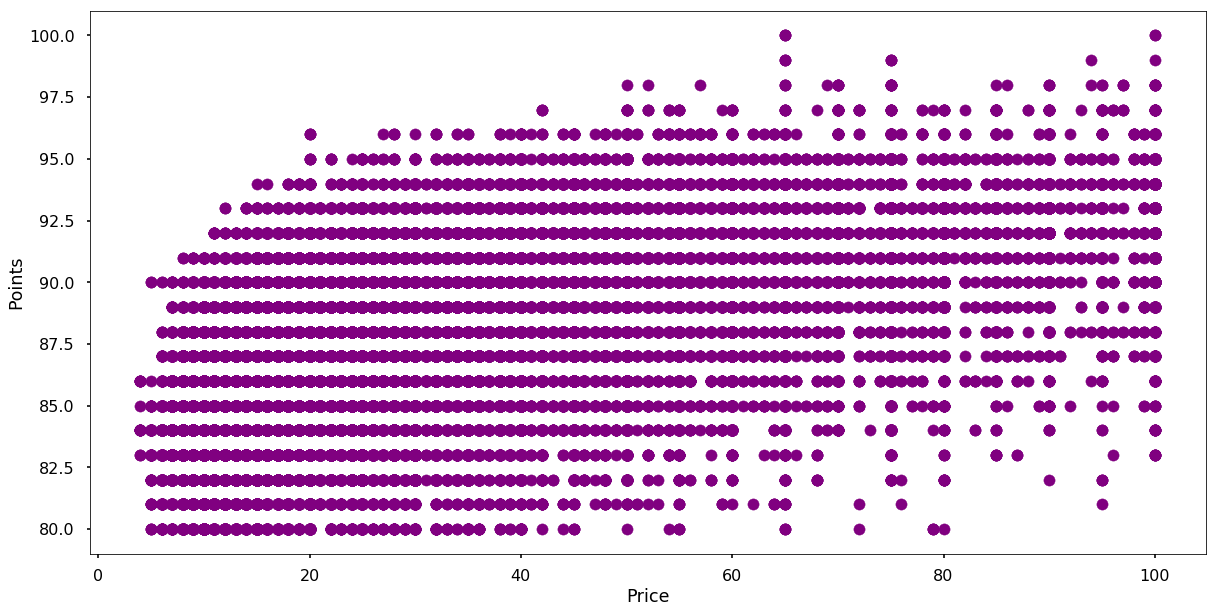

In [64]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-poster')

x = wine['price']
y = wine['points']

plt.scatter(x, y, color='purple')
plt.xlabel("Price")
plt.ylabel("Points")

# If plotting the entire dataset with the expensive wine, use Log scale
# plt.xscale('log')

plt.show()

## Regression Analysis

Using a regression, try to predict the price of the wine based on points

In [78]:
features = ['points']
target = ['price']
X = wine[features]
y = wine[target]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [80]:
y_test.describe()

,price
count,44145.000000
mean,29.161355
std,18.726518
min,4.000000
25%,15.000000
50%,24.000000
75%,38.000000
max,100.000000


In [81]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [82]:
y_prediction = regressor.predict(X_test)
y_prediction

array([40.90081005, 24.22203791, 19.16607143, ..., 19.13811522,
       31.32805606, 24.22203791])

In [83]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [84]:
print(RMSE)

15.113338693146959


In [96]:
# tree.export_graphviz(regressor, out_file='tree.dot') 

## Clustering of the Descriptions

Using **k-Means** we're going to vectorize all of the descriptions and then cluster all of the wines into two groups; resulting in Reds and Whites.  This will allow us to classify any future wines based on the descriptions used and the flavor characteristics.

In [26]:
vectorizer = TfidfVectorizer(stop_words='english')
V = vectorizer.fit_transform(wine['description'])

In [27]:
# Run k-Means 
model = KMeans(n_clusters=2, init='k-means++', max_iter=25, n_init=1)
model.fit(V)
clust_labels = model.predict(V)
cent = model.cluster_centers_

kmeans = pd.DataFrame(clust_labels)
wine.insert((wine.shape[1]),'kmeans',kmeans)

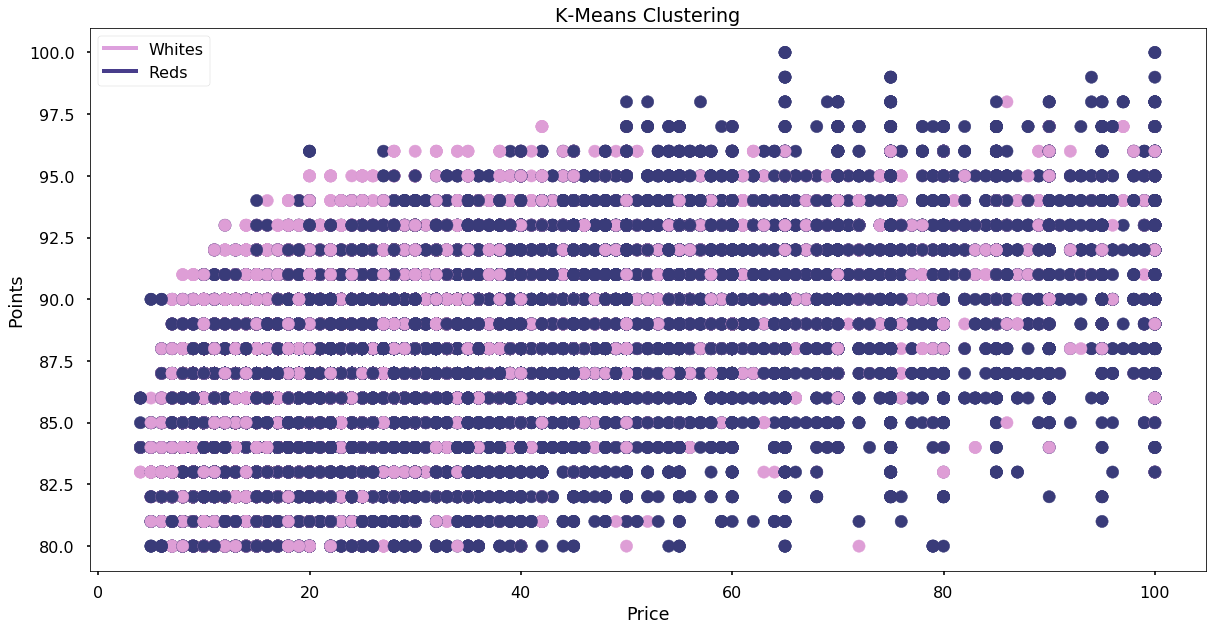

In [120]:
#Plot the clusters obtained using k means
plt.style.use('seaborn-poster')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

custom_lines = [Line2D([1], [1], color='plum', lw=4),
                Line2D([1], [1], color='darkslateblue', lw=4)]

x_wine = wine['price']
y_wine = wine['points']

scatter = ax.scatter(x_wine , y_wine, c=kmeans[0], s=150, alpha=1, cmap='tab20b', marker='o', edgecolors=None)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('Points')

ax.legend(custom_lines, ['Whites', 'Reds'])

#plt.colorbar(scatter)
plt.show()

In [30]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 wine
 flavors
 cherry
 tannins
 fruit
 black
 red
 berry
 finish
 aromas
 blackberry
 drink
 spice
 ripe
 dry
Cluster 1:
 wine
 flavors
 acidity
 apple
 citrus
 fruit
 crisp
 fresh
 white
 finish
 peach
 aromas
 palate
 pear
 green


### Use the Model to Predict Red vs. White Wine

**This is a White Wine**

In [31]:
a_white = wine.iloc[0]['description']

In [32]:
white = vectorizer.transform([a_white])
prediction = model.predict(white)
print(prediction)

[1]


**This is a Red Wine**

In [33]:
a_red = wine.iloc[4]['description']

In [34]:
red = vectorizer.transform([a_red])
prediction = model.predict(red)
print(prediction)

[0]


## Map the Wines by Region

In [35]:
by_country = wine[['designation','country']].groupby("country",as_index=False).count()
by_country.sort_values(by='designation', ascending=False).head(10)

,country,designation
42,US,39381
21,Italy,12836
14,France,9252
39,Spain,6227
8,Chile,4842
1,Argentina,3823
32,Portugal,3659
2,Australia,3165
3,Austria,2131
16,Germany,2090


In [38]:
#Ref: https://plot.ly/python/choropleth-maps/

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = dict(type = 'choropleth', 
           locations = by_country['country'],
           locationmode = 'country names',
           z = by_country['designation'], 
           text = by_country['country'],
           colorscale = scl,
           autocolorscale = False, 
           colorbar = {'title':'Wine'})
layout = dict(title = 'Wines by Country', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
choromap3 = go.Figure(data = [data], layout=layout)
py.iplot(choromap3)